In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, math, time
from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
def gen_rand_vel(sigma, limit=600, loc=0):
    while True:
        num = round( np.random.normal(loc, sigma), 3)
        if abs(num) <= limit: 
            return num

## Создание векторов точек из трёх нормальных распределений
Поскольку в реальной жизни модули скоростей зависят друг от друга, маловероятно появление векторов типа (500, 12) или (-2, 230). Будет разумно генерировать вектора скоростей с разными дисперсиями, например $\sigma$ = [10, 50, 100, 400]

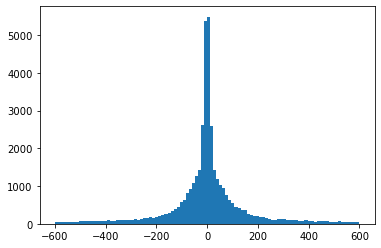

In [144]:
data = [gen_rand_vel(10) for i in range(10000)]
data.extend( [gen_rand_vel(50) for i in range(10000)] )
data.extend( [gen_rand_vel(100) for i in range(10000)] )
data.extend( [gen_rand_vel(400) for i in range(10000)] )
# print(data[:100])
plt.hist(data, 100)
plt.show()

In [145]:
for i in range(4):
    gen_rand = lambda min, max: round( random.uniform(min, max), 3)
    x = gen_rand(-0.15, 0.15)
    y = gen_rand(-0.15, 0.15)
    z = gen_rand(0.08, 0.8)
    cords = (x, y ,z)
    ball_vel = ( gen_rand(-600, 600), gen_rand(-600, 600) )
    print(cords, ball_vel)

(-0.105, 0.047, 0.272) (494.089, 365.427)
(-0.123, -0.075, 0.555) (-459.992, -570.051)
(-0.067, 0.062, 0.514) (81.366, -128.437)
(-0.037, 0.115, 0.429) (-151.377, 38.778)


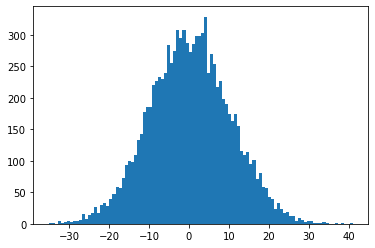

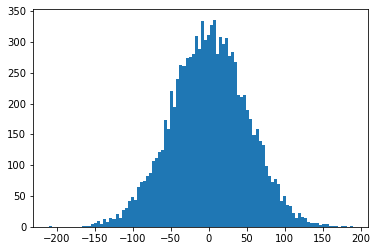

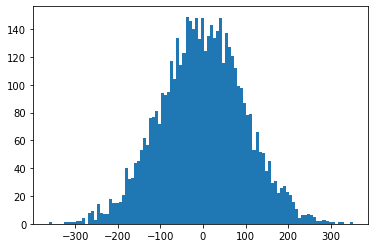

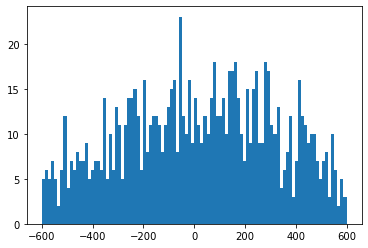

In [146]:
pairs = [(10, 10000), (50, 10000), (100, 5000), (400, 1000)] # (sigma, count of samples)

for pair in pairs:
    sigma, count = pair
    data = [gen_rand_vel(sigma) for i in range(count)]
    plt.hist(data, 100)

    plt.show()

In [147]:
# pairs = [(10, 10000), (50, 10000), (100, 5000), (400, 1000)] # (sigma, count of samples)

pairs = [(10, 10), (50, 10), (100, 5), (400, 10)] # (sigma, count of samples)
gen_rand = lambda min, max: round( random.uniform(min, max), 3)
arr = []

for pair in pairs:
    sigma, count = pair
    
    
    for i in range(count):
        x = gen_rand(-0.15, 0.15)
        y = gen_rand(-0.15, 0.15)
        z = gen_rand(0.08, 0.8)
        cords = (x, y ,z)
        ball_vel = ( gen_rand_vel(sigma), gen_rand_vel(sigma) )
        arr.append([*cords, *ball_vel])
#         print(arr[-1])
#     print()
    
#     plt.hist(data, 100)
#     plt.show()

In [159]:
data = pd.DataFrame(arr, columns=['x', 'y', 'z', 'x_vel', 'y_vel'])
print(data)
data.to_csv('data/01_checked_dots.csv', index=False)

        x      y      z    x_vel    y_vel
0  -0.021  0.090  0.587    5.953  -16.434
1  -0.110 -0.063  0.173    7.713    9.357
2  -0.134 -0.041  0.798   -5.169   -0.452
3  -0.046 -0.053  0.747   19.447   16.406
4   0.055  0.107  0.561   -2.072   -1.187
5   0.099 -0.051  0.324   17.089    2.980
6  -0.121 -0.017  0.785   12.528   -3.595
7  -0.003 -0.088  0.642   11.800   14.210
8  -0.006 -0.071  0.195    5.479    1.324
9  -0.045 -0.084  0.686   -5.085   12.973
10  0.106 -0.001  0.525    7.387   75.816
11  0.015 -0.131  0.451   16.858   98.628
12 -0.126 -0.027  0.440   -2.846  -12.104
13  0.061  0.082  0.358  -27.332   25.705
14 -0.017  0.113  0.214  -10.678   46.661
15  0.021  0.086  0.276    6.508   53.207
16 -0.079 -0.045  0.654   99.562  -52.644
17  0.077 -0.013  0.644   11.560  -18.399
18 -0.028  0.023  0.684    4.725  -45.726
19 -0.099 -0.137  0.254  -66.455   14.295
20  0.006  0.118  0.547   65.235  -62.043
21 -0.039 -0.106  0.610   -8.062  -32.106
22 -0.141 -0.082  0.658   41.920  

# After finding the initial values we need to find the best solution for each of them. 
## For example:

In [ ]:
search_for_sol(5000, '01_checked_dots.csv')

## this command will start searching for solutions for each row in the table starting with 5000th

# Объединение нескольких csv (Merge)
### Different parts of the same csv file are solved on the servers. Let's combine it into one dataframe

In [131]:
# make a loop!
da1 = pd.read_csv('data/semi/' + '1-5000.csv')
da2 = pd.read_csv('data/semi/' + '2-1829.csv')
da3 = pd.read_csv('data/semi/' + '3-1035.csv')
da4 = pd.read_csv('data/semi/' + '4-654.csv')
da5 = pd.read_csv('data/semi/' + '4-2-350.csv')

def merge_csv(x, y):
    count_in_first = x.count().score
    count_in_second = y.count().score
    x.update(y)
    print('{} cases + {} cases = {} distinct cases'.format(count_in_first, count_in_second, x.count().score) )
    return x

def rate(x):
    x = x.dropna()
    up = x.shape[0]
    down = x[x['score'] > 0.8].shape[0]
    print(round(down/up*100, 2), '% of cases was OK')
    
rate(da1)

all_in_one = merge_csv(merge_csv(merge_csv(merge_csv(da1, da2), da3), da4), da5)

46.29 % of cases was OK
5001 cases + 5113 cases = 6964 distinct cases
6964 cases + 6037 cases = 8000 distinct cases
8000 cases + 6692 cases = 8655 distinct cases
8655 cases + 5347 cases = 9000 distinct cases


In [12]:
all_in_one.shape

(26000, 10)

In [13]:
all_in_one.dropna()

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
2,-0.027,0.108,0.627,-15.856,-0.962,13.332427,6.424485,0.683311,39.804381,0.658047
3,0.104,-0.018,0.395,20.382,15.116,0.000075,-6.324480,0.382367,44.157762,0.945130
4,0.086,-0.012,0.194,-17.039,-20.237,0.000257,-4.563653,0.698303,29.848553,0.875869
...,...,...,...,...,...,...,...,...,...,...
25995,-0.072,-0.009,0.278,207.829,-142.608,-9.182039,-10.096633,0.715742,39.437170,0.882428
25996,-0.148,0.120,0.461,228.942,-219.372,-12.319799,-10.082610,0.445715,41.066767,0.718778
25997,-0.054,0.135,0.729,-39.757,-173.994,-11.634128,9.055998,0.480315,41.996283,0.409240
25998,-0.127,-0.095,0.519,116.445,150.744,12.439913,-5.493991,0.480065,20.001615,0.534298


## Отбор по условиям. We choose only the best

In [14]:
good = all_in_one[all_in_one['score'] > 0.8]
bad = all_in_one[all_in_one['score'] == 0]

good.to_csv('data/' + '02_good.csv', index=False)
bad.to_csv('data/' + 'bad.csv', index=False)
good

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
3,0.104,-0.018,0.395,20.382,15.116,0.000075,-6.324480,0.382367,44.157762,0.945130
4,0.086,-0.012,0.194,-17.039,-20.237,0.000257,-4.563653,0.698303,29.848553,0.875869
5,-0.015,-0.037,0.190,-0.036,6.637,-0.000081,0.000264,0.668299,30.320623,0.853169
...,...,...,...,...,...,...,...,...,...,...
25989,0.038,-0.141,0.135,-297.577,16.796,-5.389699,19.144031,0.861369,16.491543,0.872030
25992,0.034,0.006,0.398,-140.796,-94.286,-5.794349,7.497010,0.404426,44.553993,0.982263
25993,-0.003,-0.079,0.136,136.550,24.156,-2.818070,-9.044647,0.888450,20.478109,0.999044
25994,0.039,-0.005,0.127,9.301,-154.837,-10.668949,-2.824752,0.878546,18.317232,0.991386


# Аугментация данных (data augmentation)
## Each case obtained in the previous steps can be multiplied 3 times by rotating 90, 180, 270 degrees. This is a classic example of data augmentation
### [Note about rotations](https://flexbooks.ck12.org/cbook/ck-12-interactive-middle-school-math-8-for-ccss/section/1.10/primary/lesson/rotations-on-the-coordinate-plane-msm8-ccss/)

In [15]:
def augment(input_file_name, output_file_name):
    data = pd.read_csv('data/' + input_file_name)
    new_data = []
    print(new_data)
    for i in range(len(data)):
        case = data.iloc[i]
        x, y, z, x_vel, y_vel, alpha, beta, z_vel, delay, score = case.x, case.y, case.z, case.x_vel, case.y_vel, case.alpha, case.beta, case.z_vel, case.delay, case.score
        new_data.append((x, y, z, x_vel, y_vel, alpha, beta, z_vel, delay, score)) # 0 deg
        new_data.append((y, -x, z, y_vel, -x_vel, beta, -alpha, z_vel, delay, score)) # 90 deg clockwise
        new_data.append((-x, -y, z, -x_vel, -y_vel, -alpha, -beta, z_vel, delay, score)) # 180 deg
        new_data.append((-y, x, z, -y_vel, x_vel, -beta, alpha, z_vel, delay, score)) # 270 deg
    data2 = pd.DataFrame(new_data, columns=['x', 'y', 'z', 'x_vel', 'y_vel', 'alpha', 'beta', 'z_vel', 'delay', 'score'])
    data2.to_csv('data/' + output_file_name, index=False)

augment('02_good.csv', '03_for_train.csv')

[]


In [12]:
data = pd.read_csv('data/' + '03_for_train.csv')
print(data.shape)
data.head(8)

(12408, 10)


,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.119,-0.101,0.422,-9.148,-10.615,-5.685991,6.523658,0.404929,46.717107,0.971391
2,-0.101,0.119,0.422,-10.615,9.148,6.523658,5.685991,0.404929,46.717107,0.971391
3,0.119,0.101,0.422,9.148,10.615,5.685991,-6.523658,0.404929,46.717107,0.971391
4,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
5,0.024,0.001,0.179,5.667,-10.565,-0.000616,-1.881013,0.968161,29.071669,0.954244
6,0.001,-0.024,0.179,-10.565,-5.667,-1.881013,0.000616,0.968161,29.071669,0.954244
7,-0.024,-0.001,0.179,-5.667,10.565,0.000616,1.881013,0.968161,29.071669,0.954244


# Linear regression for each target feature separately
## Самый очевидный и простой подход (The most obvious and simple approach)

In [14]:
data = data.drop(['score'], axis = 1).sample(frac=1)
data

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay
5777,0.052,0.141,0.333,14.378,-2.263,9.912366,-4.256297,0.492526,39.764000
10302,-0.001,0.108,0.337,-43.127,-102.634,-0.000861,2.897545,0.571318,45.608666
7705,0.057,-0.035,0.351,7.022,22.365,0.000287,-3.702100,0.487498,44.665041
7814,0.026,0.112,0.393,-4.292,3.680,5.793831,0.000073,0.461046,47.378008
1499,-0.040,-0.093,0.214,-7.750,-21.160,-8.421436,5.102782,0.545455,28.000588
...,...,...,...,...,...,...,...,...,...
1721,-0.005,0.014,0.139,-23.920,-2.772,0.000063,-0.000089,0.500016,19.998600
788,0.056,-0.066,0.232,23.567,10.220,-4.221798,-5.389325,0.545466,32.710845
1437,-0.080,0.135,0.332,-21.011,1.177,7.091101,5.486577,0.520823,41.461340
8967,-0.066,-0.141,0.260,9.304,1.179,-9.216892,3.601042,0.463985,31.974918


In [15]:
full_train_data = data.iloc[:-1000, :]
full_test_data = data.iloc[-1000:, :]

targets = ['alpha', 'beta', 'z_vel', 'delay']
print('Shapes of train:{}   test:{}   and all:{}'.format(full_train_data.shape, full_test_data.shape, data.shape))

Shapes of train:(11408, 9)   test:(1000, 9)   and all:(12408, 9)


## Линейная форма
### Средняя абсолютная ошибка для каждого искомого признака:

In [202]:
for target in targets:
    train_labels = full_train_data[target].values
    train_data = full_train_data.drop(targets, axis = 1)
    test_labels = full_test_data[target].values
    test_data = full_test_data.drop(targets, axis = 1)
    
    scaler = StandardScaler()
    regressor = linear_model.SGDRegressor(random_state = 0, max_iter=5)
    
    pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])
    pipeline.fit(train_data, train_labels)
    mae = metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))
    print('For', target, ' MAE = ',  round(mae,3))
    

For alpha  MAE =  1.102
For beta  MAE =  1.073
For z_vel  MAE =  0.091
For delay  MAE =  2.918


## Полиномиальная форма, степени [2, 4]

In [16]:
for degree in range(2,5):
    print('For degree = ', degree)
    
    for target in ['alpha', 'beta', 'z_vel', 'delay']:
        train_labels = full_train_data[target].values
        train_data = full_train_data.drop(targets, axis = 1)
        test_labels = full_test_data[target].values
        test_data = full_test_data.drop(targets, axis = 1)

        poly = PolynomialFeatures(degree)
        scaler = StandardScaler()
        regressor = linear_model.SGDRegressor(random_state = 0, max_iter=5)

        pipeline = Pipeline(steps = [('polynomial', poly), ('scaling', scaler), ('regression', regressor)])
        pipeline.fit(train_data, train_labels)
        mae = metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))
        print(' ', target, ' MAE = ',  round(mae,3))
    print()

For degree =  2
  alpha  MAE =  0.906
  beta  MAE =  0.953
  z_vel  MAE =  0.095
  delay  MAE =  2.183

For degree =  3
  alpha  MAE =  0.904
  beta  MAE =  0.957
  z_vel  MAE =  0.095
  delay  MAE =  1.912

For degree =  4
  alpha  MAE =  329592.869
  beta  MAE =  374809.812
  z_vel  MAE =  16567.92
  delay  MAE =  483185.946



### Лучшее вариант решения в сокращенном виде

In [17]:
targets = ['alpha', 'beta', 'z_vel', 'delay']
train_labels = full_train_data[targets]
train_data = full_train_data.drop(targets, axis = 1)
test_labels = full_test_data[targets]
test_data = full_test_data.drop(targets, axis = 1)

poly = PolynomialFeatures(2)
scaler = StandardScaler()
regressor = MultiOutputRegressor(linear_model.SGDRegressor(random_state = 0, max_iter=5))

pipeline = Pipeline(steps = [('polynomial', poly), ('scaling', scaler), ('regression', regressor)])
pipeline.fit(train_data, train_labels)

pred = pipeline.predict(test_data)
mae = metrics.mean_absolute_error(test_labels, pred, multioutput='raw_values')
print('MAE = ',  *mae)
# print( pred[0] )
# print( pipeline.coef_ )

MAE =  0.9060234526504205 0.9530106327717586 0.09500166161686754 2.1833796131066165


In [18]:
raw_input = [0.052, 0.036, 0.677, -57.223, 2.875]
aza = np.array(raw_input, dtype=np.float64).reshape(1, -1)
pred = pipeline.predict(aza)
print(list(pred))

[array([ 8.51067267e-01,  2.38512430e+00, -7.46435686e-04,  6.52536724e+01])]


In [ ]:
d